# Solutions for Lab Sheet 4 (COM3502-4502-6502 Speech Processing)

This lab sheet (solution) is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-4-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [1]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling (uncomment if you want)
import numpy as np               # math

## Frequency analysis (of periodic signals)


[Fourier analysis](https://en.wikipedia.org/wiki/Fourier_analysis "Read additional information on Fourier Analysis on Wikipedia")

[Joseph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier)

Theorem: any periodic signal of frequency $f_0$ can be constructed exactly by adding together ‘sinusoids’ (sine waves) with frequencies …
$f_0$, $2f_0$, $3f_0$, $4f_0$, $5f_0$, etc.


## Fourier series of Saw-tooth signal

\begin{eqnarray*}
f(t) &=& \frac{2}{\pi}\left[\sin(\omega_0t) + \frac{\sin(2\omega_0t)}{2} + \frac{\sin(3\omega_0t)}{3} + \cdots\right]\\
     &=& \frac{2}{\pi} \sum_{k=1}^{\infty}\,\frac{\sin(k\omega_0t)}{k}
\end{eqnarray*}

with $\omega = 2 \pi f$ being the angular frequency.

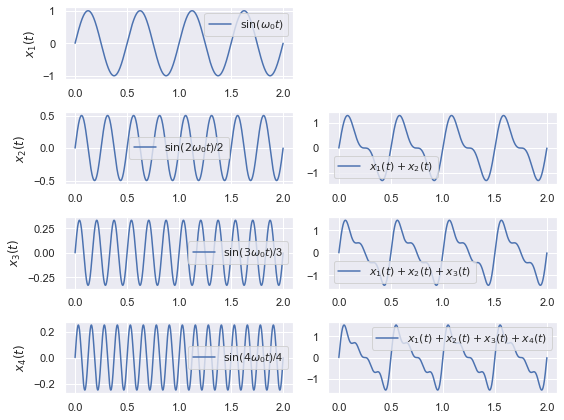

In [3]:
fs=8000 # sampling frequency

t=np.arange(0,2,1/fs) # time vector
f0=2                  # fundamental frequency in Hz

sin1=np.sin(2*np.pi*f0*t)
sin2=np.sin(2*np.pi*2*f0*t)/2
sin3=np.sin(2*np.pi*3*f0*t)/3
sin4=np.sin(2*np.pi*4*f0*t)/4

plt.figure(figsize=(8, 6))

plt.subplot(4,2,1)
plt.plot(t,sin1,label='$\mathrm{sin}(\omega_0 t$)')
plt.ylabel('$x_1(t)$')
plt.legend()

plt.subplot(4,2,3)
plt.plot(t,sin2,label='$\mathrm{sin}(2 \omega_0 t$)/2')
plt.ylabel('$x_2(t)$')
plt.legend()

plt.subplot(4,2,4)
plt.plot(t,sin1+sin2,label='$x_1(t)+x_2(t)$')
plt.legend()

plt.subplot(4,2,5)
plt.plot(t,sin3,label='$\mathrm{sin}(3 \omega_0 t$)/3')
plt.ylabel('$x_3(t)$')
plt.legend()

plt.subplot(4,2,6)
plt.plot(t,sin1+sin2+sin3,label='$x_1(t)+x_2(t)+x_3(t)$')
plt.legend()

plt.subplot(4,2,7)
plt.plot(t,sin4,label='$\mathrm{sin}(4 \omega_0 t$)/4')
plt.ylabel('$x_4(t)$')
plt.legend()

plt.subplot(4,2,8)
plt.plot(t,sin1+sin2+sin3+sin4,label='$x_1(t)+x_2(t)+x_3(t)+x_4(t)$')
plt.legend()

plt.tight_layout() # this allowes for some space for the title text.
None

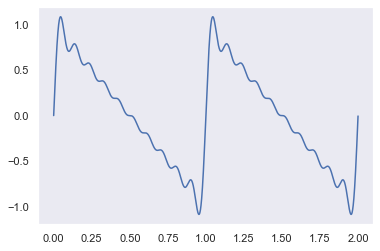

In [5]:
def generateSawTooth(f0=1, length = 2, fs=8000, order=10):
    """
    Return a saw-tooth signal with given parameters.
    
    Parameters
    ----------
    f0 : float, optional
        fundamental frequency $f_0$ of the signal to be generated,
        default: 1 Hz
    length : float, optional
        length of the signal to be generated, default: 2 sec.
    fs : float, optional
        sampling frequency $f_s$, default: 8000 Hz
    order : int, optional
        number of sinosuids to approximate saw-tooth, default: 10

    Returns
    -------
    sawTooth
        generated sawtooth signal
    t
        matching time vector
    """
    t=np.arange(0,length,1/fs)  # time vector
    sawTooth = np.zeros(len(t)) # pre-allocate variable with zeros 
    for ii in range(order):
        jj=ii+1
        sawTooth += np.sin(2*np.pi*jj*f0*t)/jj
    return 2*sawTooth/np.pi, t

signal,t = generateSawTooth()
plt.plot(t,signal)
plt.grid()